0.2   0.025   19.4
Дискриминант равен  -15.519375
real part =  -0.0625
 imagenery part=  9.84865949000167
A=  0.44  B=  0.00279225817766549


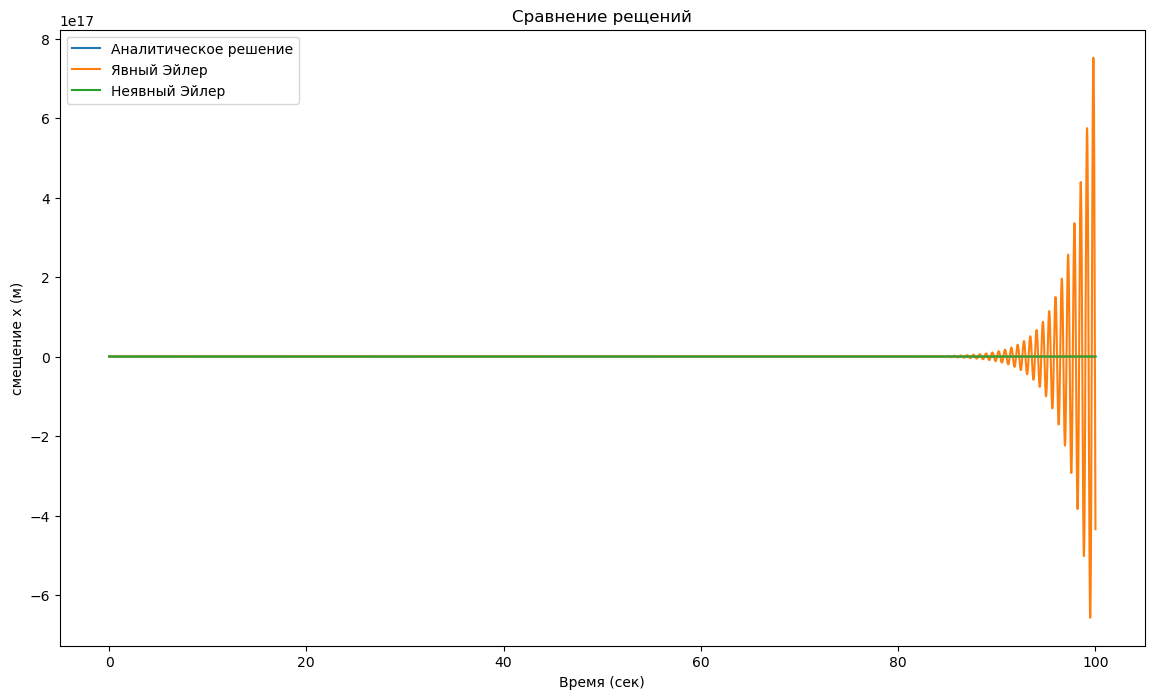

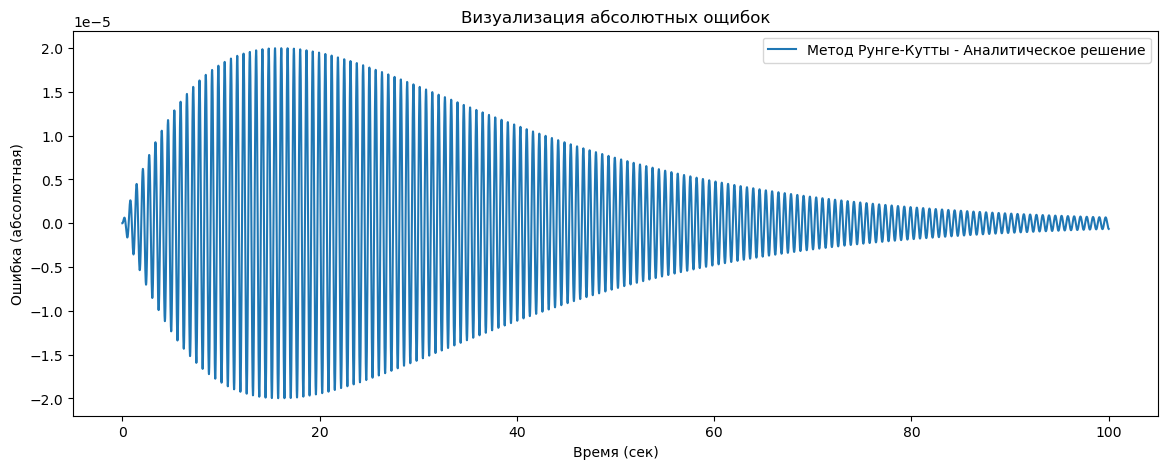

In [37]:
import numpy as np
import matplotlib.pyplot as plt

m=0.2
k=19.4
b=0.025
a, b, c, d = m, b, k, 0
x0 = 0.44                        
v0 = 0.0                         # изначальная скорость x˙(0)
Tf = 100.0                        # время симуляции (c)
h = 0.01                         # шаг (c)

def linear_ode_dynamics(state):
    x, v = state[0], state[1]
    xdd = (d - b * v - c * x) / a
    return np.array([v, xdd])


def forward_euler(fun, x0, Tf, h):

    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    
    for k in range(len(t) - 1):
        x_hist[:, k + 1] = x_hist[:, k] + h * fun(x_hist[:, k])
    
    return x_hist, t

def backward_euler(fun, x0, Tf, h, tol=1e-8, max_iter=100):
 
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    
    for k in range(len(t) - 1):
        x_hist[:, k + 1] = x_hist[:, k]  # Initial guess
        
        for i in range(max_iter):
            x_next = x_hist[:, k] + h * fun(x_hist[:, k + 1])
            error = np.linalg.norm(x_next - x_hist[:, k + 1])
            x_hist[:, k + 1] = x_next
            
            if error < tol:
                break
    
    return x_hist, t

def runge_kutta4(fun, x0, Tf, h):

    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    
    for k in range(len(t) - 1):
        k1 = fun(x_hist[:, k])
        k2 = fun(x_hist[:, k] + 0.5 * h * k1)
        k3 = fun(x_hist[:, k] + 0.5 * h * k2)
        k4 = fun(x_hist[:, k] + h * k3)
        
        x_hist[:, k + 1] = x_hist[:, k] + (h / 6.0) * (k1 + 2*k2 + 2*k3 + k4)
    
    return x_hist, t

def analytic_solution(t):
    xp = d / c # частное решение взятьое из trial table (не знаю как называется по русски, но у для d равного константе решение тоже будет констаннтой)
    disc = b**2 - 4*a*c
    print("Дискриминант равен ", disc)

    # Найдем константы исходя из значения дискриминанта
    if disc < 0:
        rel = -b/(2*a)
        print("real part = ", rel)
        img = np.sqrt(4*a*c - b**2)/(2*a)
        print(" imagenery part= ", img)
        # x = xp + e^{alpha t} (A cos(ωt) + B sin(ωt))
        # x(0) = xp + A -> A = x0 - xp
        A = x0 - xp
        B = (v0 - rel*A)/img
        e = np.exp(rel*t)
        cos_ = np.cos(img*t)
        sin_ = np.sin(img*t)
        x = xp + e*(A*cos_ + B*sin_)
        v = e*((-A*img*sin_ + B*img*cos_) + rel*(A*cos_ + B*sin_))
        print("A= ", A, " B= ", B)
   
    return x, v


x0_vec = np.array([x0, v0])

# Запуск работы численных методов
xfe, t = forward_euler(linear_ode_dynamics, x0_vec, Tf, h)
xbe, _ = backward_euler(linear_ode_dynamics, x0_vec, Tf, h)
xrk, _ = runge_kutta4(linear_ode_dynamics, x0_vec, Tf, h)

# Запкск аналитического рещения
xa, va = analytic_solution(t)

# расчет отклонений численных методов от аналитического решения
fe_err = np.linalg.norm(xfe[0] - xa, ord=np.inf)
be_err = np.linalg.norm(xbe[0] - xa, ord=np.inf)
rk_err = np.linalg.norm(xrk[0] - xa, ord=np.inf)


plt.figure(figsize=(14, 8))
plt.plot(t, xa, label="Аналитическое решение")
plt.plot(t, xfe[0], label="Явный Эйлер")
plt.plot(t, xbe[0], label="Неявный Эйлер")
#plt.plot(t, xrk[0], label="Метод Рунге-Кутты")
plt.xlabel("Время (сек)")
plt.ylabel("смещение x (м)")
plt.legend()
plt.title("Сравнение рещений")
plt.show()

plt.figure(figsize=(14, 5))
#plt.plot(t, (xfe[0]-xa), label="Явный эйлер - Аналитическое решение")
#plt.plot(t, (xbe[0]-xa), label="Неявный эйлер - Аналитическое решение")
plt.plot(t, (xrk[0]-xa), label="Метод Рунге-Кутты - Аналитическое решение")
plt.xlabel("Время (сек)")
plt.ylabel("Ошибка (абсолютная)")
plt.legend()
plt.title("Визуализация абсолютных ощибок")
plt.show()